In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display 
%matplotlib inline
Data = pd.read_csv('C:/Users/user/Desktop/WorkAssign/PreScreen_r3/ingredient.csv')

# Data Exploration

In [22]:
display(Data.describe())

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


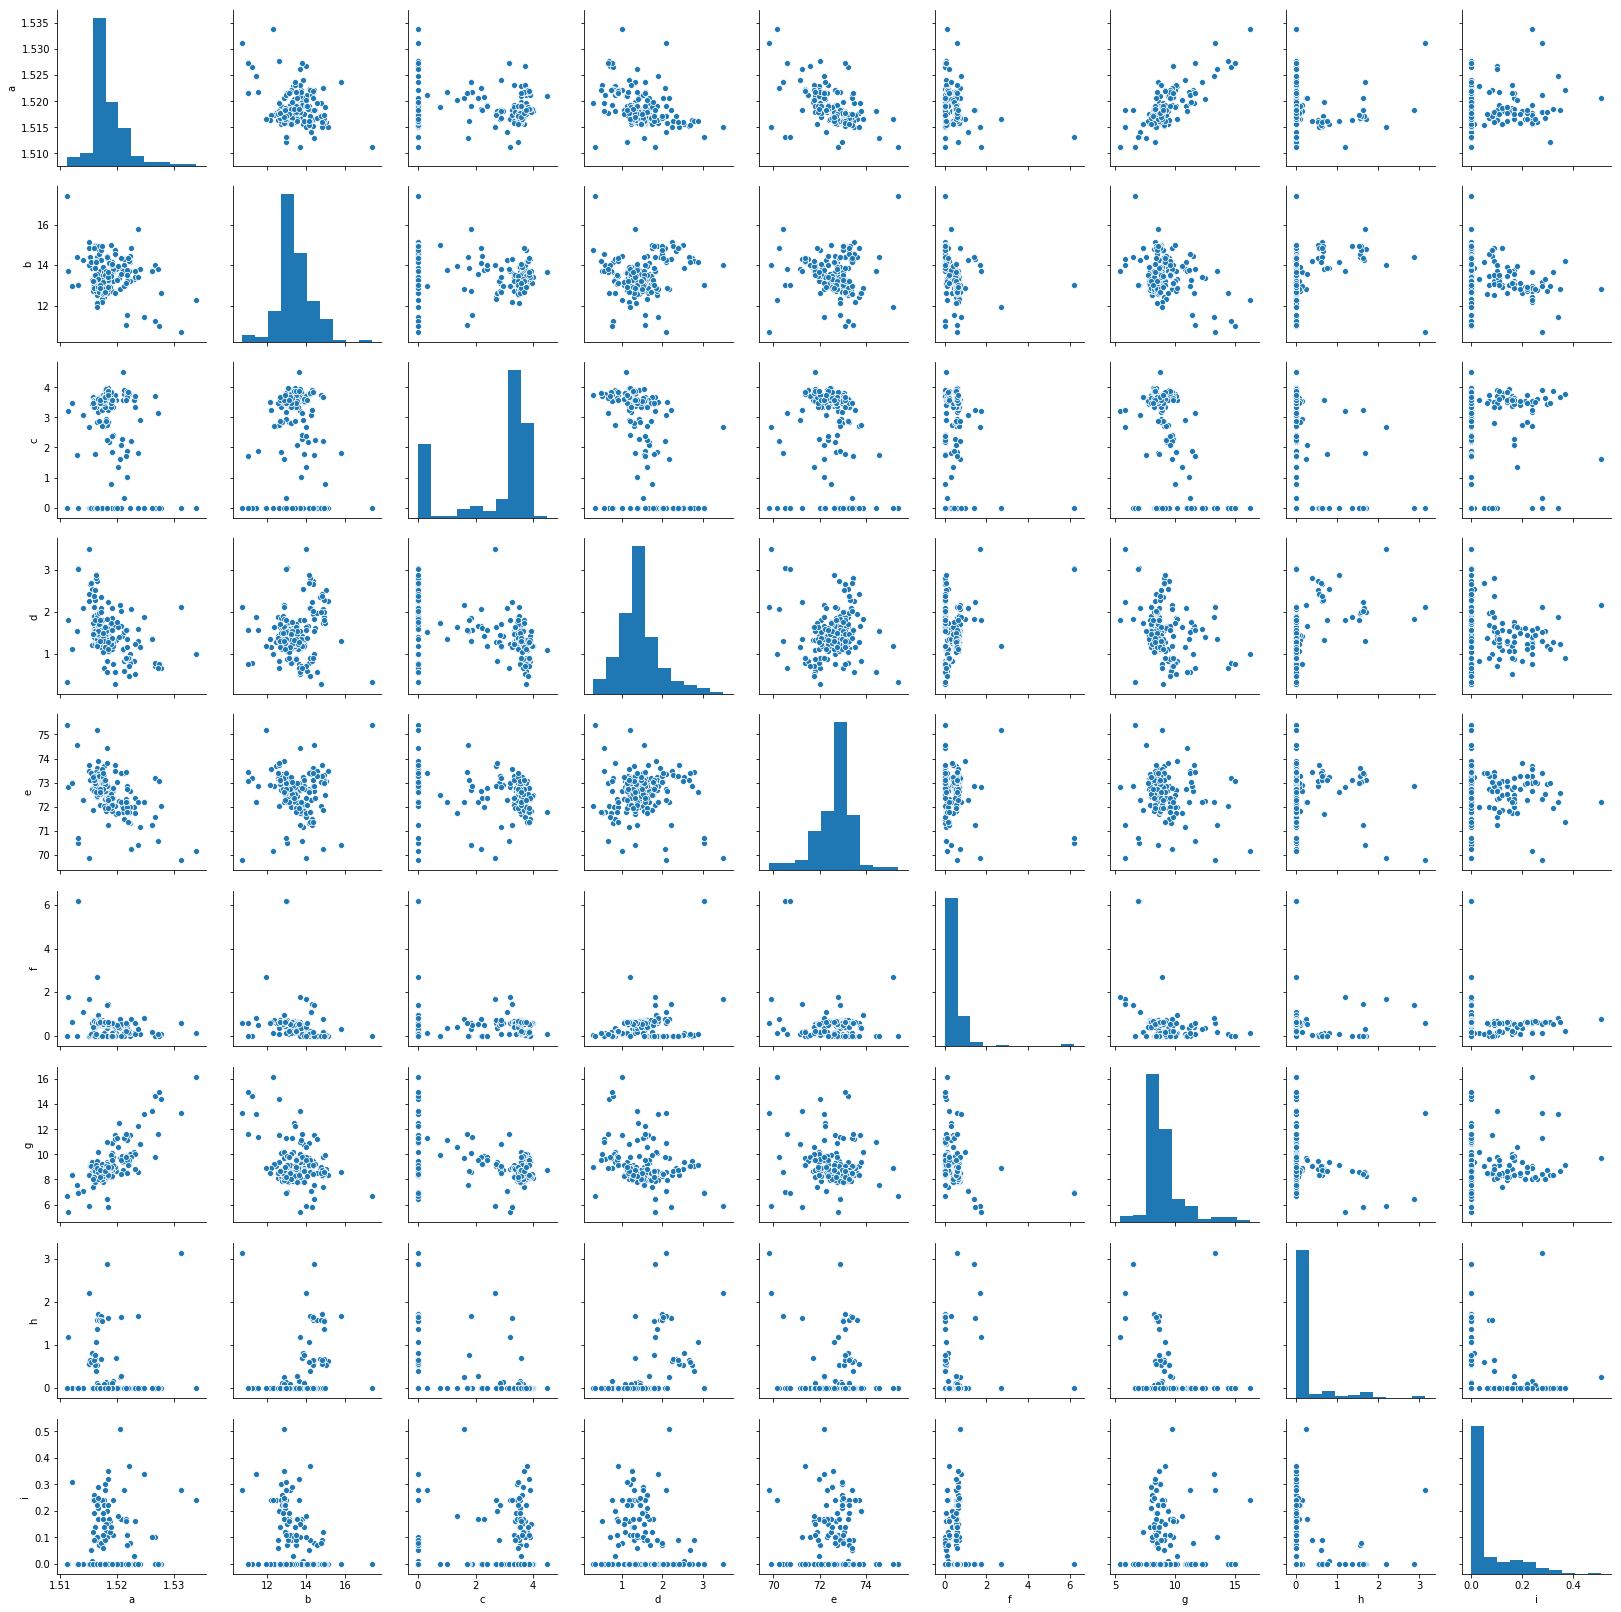

In [23]:
sns.pairplot(Data)
plt.show()

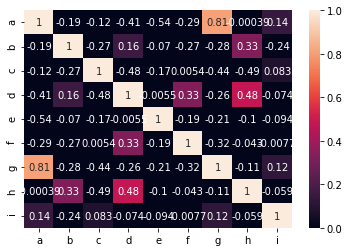

In [24]:

sns.heatmap(Data.corr(), vmin=0, vmax=1, annot=True)

Most of the data is not normally distributed, it is positively skewed.In most plots, most data points lie near the origin which shows little correlation between them. From the scatter plots and the heatmap of correlation, we can see that there is a strong correlation between the ‘a’ and ‘g’ features. The features ‘d’ and ‘h’ also show a good degree of correlation. 



This correlation  of the ‘a’ feature, which can be accurately predicted with the ‘g’ feature. And, therefore, is not an absolutely necessary feature in the dataset.

# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
ScalerData = scaler.fit_transform(Data) 

In [26]:
DfData = pd.DataFrame(ScalerData)

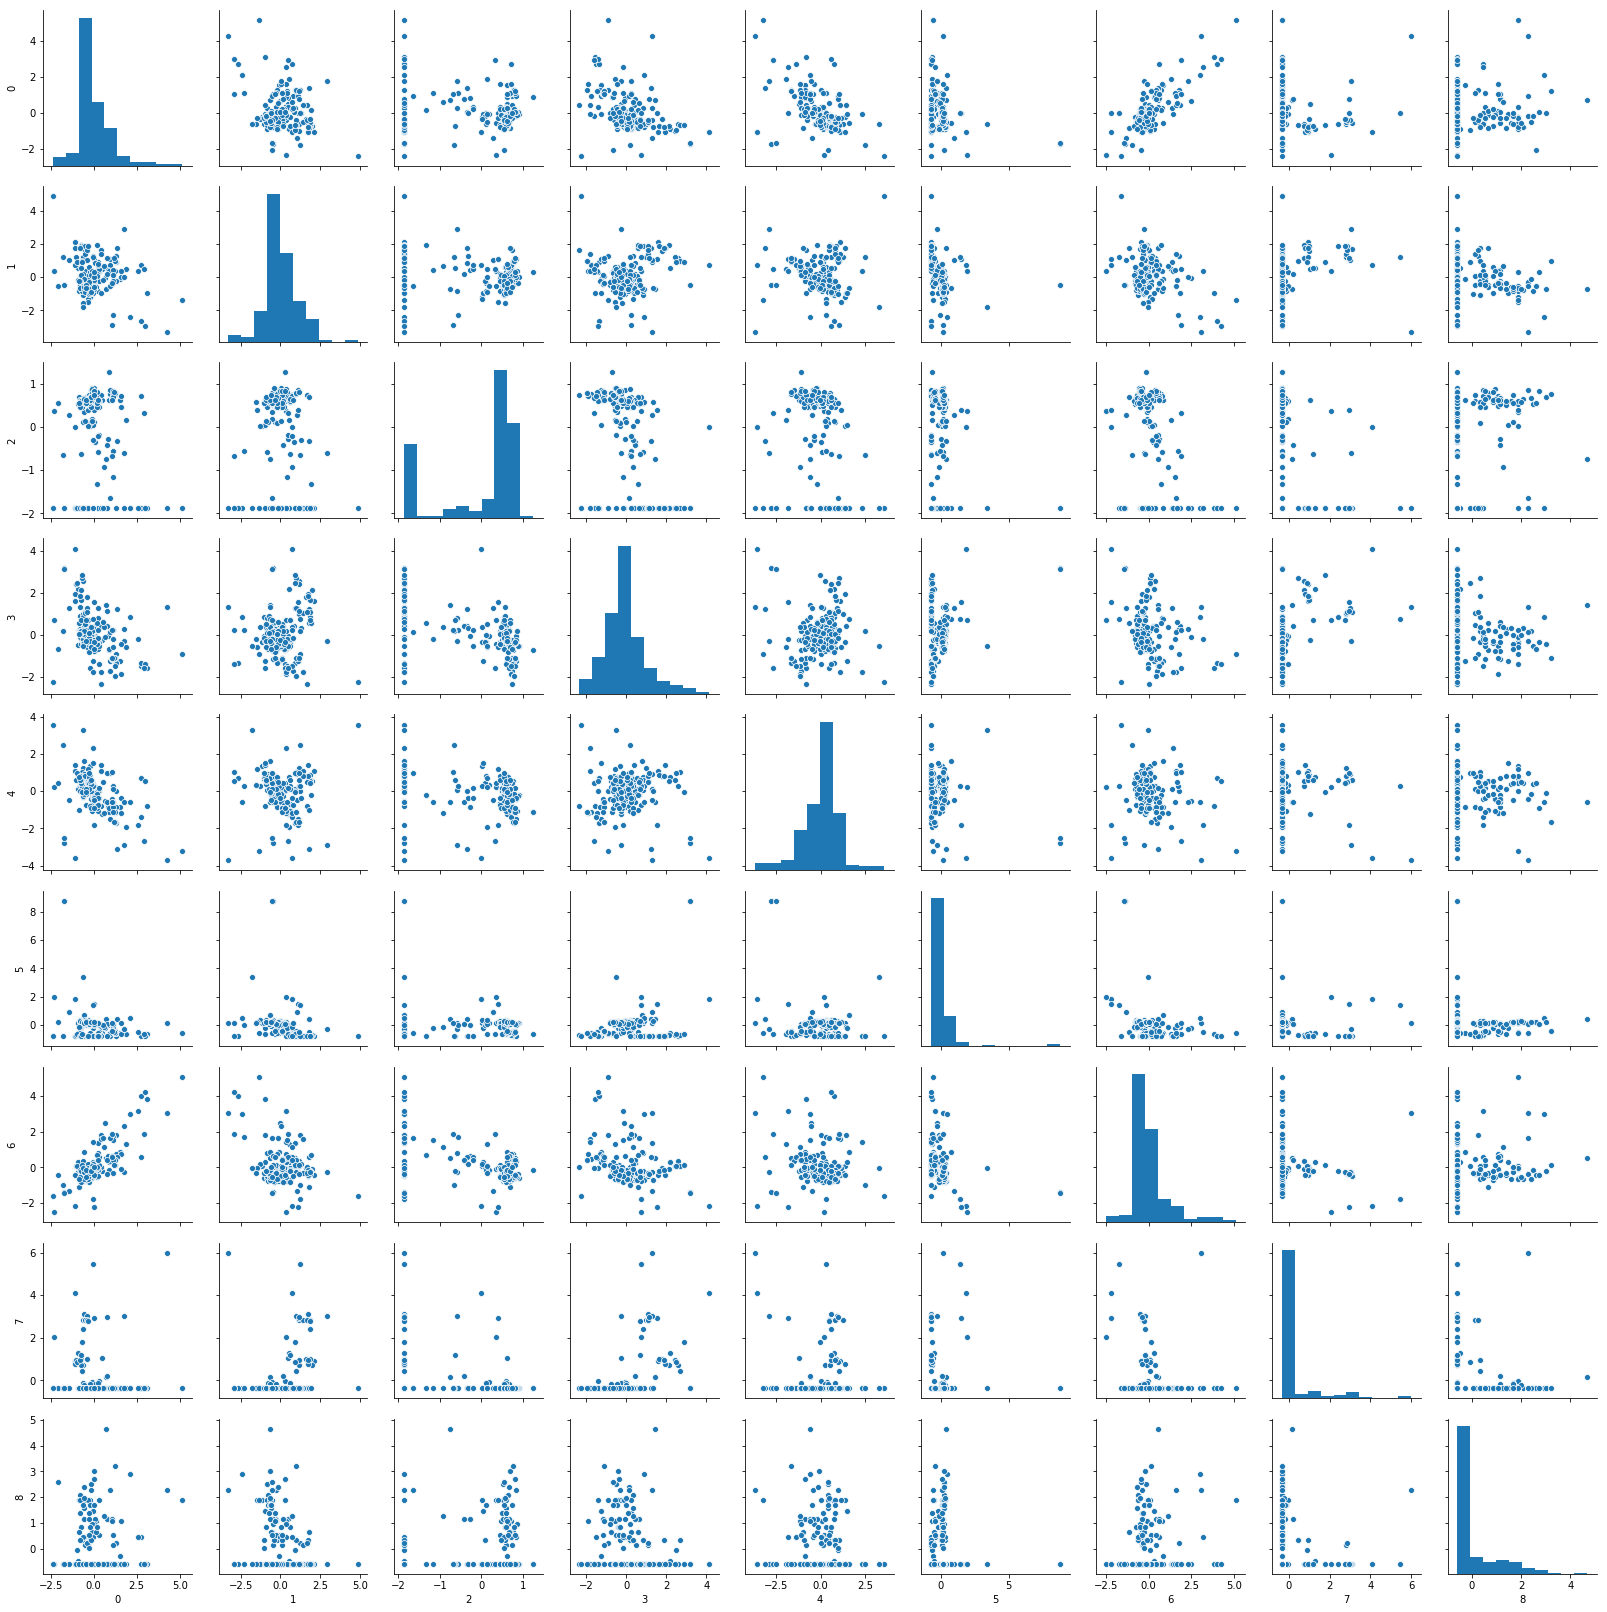

In [27]:
sns.pairplot(DfData)
plt.show()

# Outlier Detection

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [29]:
outliers = []


for feature in DfData.keys():
    
  
    Q1 = np.percentile(DfData[feature],25)
    Q3 = np.percentile(DfData[feature],75) 
    step = 1.5 * (Q3-Q1)
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(DfData[~((DfData[feature] >= Q1 - step) & (DfData[feature] <= Q3 + step))])
    lista = DfData[~((DfData[feature] >= Q1 - step) & (DfData[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature '0':


,0,1,2,3,4,5,6,7,8
1,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
17,1.892750,0.518170,0.149731,-0.551908,-1.942369,-0.640968,1.291031,-0.352877,-0.586451
42,3.104068,-0.942502,-1.865511,-1.555719,-0.816496,-0.671705,3.833599,-0.352877,-0.586451
46,-2.328706,0.346326,0.358204,0.732970,0.205848,1.941001,-2.484084,2.046045,-0.586451
82,1.595697,0.383150,0.719557,-1.876939,-1.165905,-0.625599,0.776883,-0.352877,1.059457
87,1.744224,2.923983,-0.593824,-0.270841,-2.874126,-0.287484,-0.244370,3.033836,-0.586451
101,2.107289,-2.403175,-1.865511,0.873503,-0.596498,0.480959,3.016596,-0.352877,2.911104
109,2.741002,0.714563,0.705659,-1.475414,-1.398844,-0.733181,0.607848,-0.352877,0.442242
121,2.731101,-2.673215,-1.865511,-1.354957,0.723490,-0.763919,4.030806,-0.352877,-0.586451
126,2.566071,0.358601,-1.865511,-0.170460,-1.825899,-0.471910,3.157459,-0.352877,0.442242


Data points considered outliers for the feature '1':


,0,1,2,3,4,5,6,7,8
1,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
87,1.744224,2.923983,-0.593824,-0.270841,-2.874126,-0.287484,-0.244370,3.033836,-0.586451
101,2.107289,-2.403175,-1.865511,0.873503,-0.596498,0.480959,3.016596,-0.352877,2.911104
121,2.731101,-2.673215,-1.865511,-1.354957,0.723490,-0.763919,4.030806,-0.352877,-0.586451
144,2.978645,-2.930981,-1.865511,-1.395110,0.555256,-0.763919,4.228014,-0.352877,-0.586451
185,-2.381516,4.875637,-1.865511,-2.218235,3.570524,-0.763919,-1.624822,-0.352877,-0.586451
201,1.037897,-2.918706,-0.677213,0.231064,1.021135,0.127475,1.875610,-0.352877,-0.586451


Data points considered outliers for the feature '2':


,0,1,2,3,4,5,6,7,8


Data points considered outliers for the feature '3':


,0,1,2,3,4,5,6,7,8
7,-1.718097,-0.476069,-1.865511,3.202345,-2.809420,8.780145,-1.406486,-0.352877,-0.586451
22,-0.925955,0.567268,-1.865511,2.198534,0.749372,-0.548755,0.319080,1.280003,-0.483582
24,-1.064580,0.739112,-0.003150,4.125851,-3.572943,1.818050,-2.174186,4.082105,-0.586451
48,-0.648705,1.180996,-1.865511,2.600058,0.257612,-0.763919,0.347252,0.735710,-0.586451
49,-0.361554,1.586056,-1.865511,1.797009,0.814078,-0.763919,-0.004904,0.977618,-0.586451
71,-0.751023,1.966568,-1.865511,2.138305,0.516433,-0.687074,-0.089421,0.715551,-0.586451
82,1.595697,0.383150,0.719557,-1.876939,-1.165905,-0.625599,0.776883,-0.352877,1.059457
86,0.427288,1.671978,0.740405,-2.318616,-0.816496,-0.717812,0.030312,-0.352877,-0.586451
99,-0.704815,0.972328,-1.865511,2.700439,1.047017,-0.702443,0.058484,0.453483,0.339372
105,1.242534,0.984603,0.789048,-1.957244,-1.140023,-0.594861,0.431770,-0.352877,-0.586451


Data points considered outliers for the feature '4':


,0,1,2,3,4,5,6,7,8
1,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
7,-1.718097,-0.476069,-1.865511,3.202345,-2.809420,8.780145,-1.406486,-0.352877,-0.586451
24,-1.064580,0.739112,-0.003150,4.125851,-3.572943,1.818050,-2.174186,4.082105,-0.586451
87,1.744224,2.923983,-0.593824,-0.270841,-2.874126,-0.287484,-0.244370,3.033836,-0.586451
96,1.354754,1.782449,-0.336707,1.234875,-3.094124,0.404115,0.565589,-0.352877,-0.586451
146,-0.061200,0.383150,-1.865511,-1.776558,2.328182,-0.763919,1.431893,-0.352877,-0.586451
150,2.932437,0.481346,0.323458,-1.575796,-2.692951,-0.640968,1.889697,-0.352877,-0.586451
178,5.137232,-1.359837,-1.865511,-0.893204,-3.223534,-0.579492,5.094318,-0.352877,1.882411
185,-2.381516,4.875637,-1.865511,-2.218235,3.570524,-0.763919,-1.624822,-0.352877,-0.586451
200,-1.774207,1.217820,-0.656366,0.190912,2.457593,-0.763919,-0.962769,-0.352877,-0.586451


Data points considered outliers for the feature '5':


,0,1,2,3,4,5,6,7,8
7,-1.718097,-0.476069,-1.865511,3.202345,-2.809420,8.780145,-1.406486,-0.352877,-0.586451
24,-1.064580,0.739112,-0.003150,4.125851,-3.572943,1.818050,-2.174186,4.082105,-0.586451
46,-2.328706,0.346326,0.358204,0.732970,0.205848,1.941001,-2.484084,2.046045,-0.586451
59,0.004812,1.119623,0.399898,1.556095,-1.812958,1.479935,-2.230531,2.933041,-0.586451
181,-0.018292,1.205545,-1.865511,0.753046,0.270553,1.403091,-1.751599,5.452917,-0.586451
205,-0.605797,-1.789447,-1.865511,-0.511756,3.272880,3.385674,-0.018990,-0.352877,-0.586451
213,-1.701594,-0.500618,-1.865511,3.162192,-2.524717,8.780145,-1.427615,-0.352877,-0.586451


Data points considered outliers for the feature '6':


,0,1,2,3,4,5,6,7,8
1,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
17,1.892750,0.518170,0.149731,-0.551908,-1.942369,-0.640968,1.291031,-0.352877,-0.586451
24,-1.064580,0.739112,-0.003150,4.125851,-3.572943,1.818050,-2.174186,4.082105,-0.586451
28,1.272239,1.254643,-1.865511,-0.893204,0.024673,-0.610230,1.805179,-0.352877,0.236503
30,0.437190,-0.942502,-1.865511,0.411750,1.422308,-0.179902,1.812222,-0.352877,-0.586451
41,0.262258,0.910956,-1.865511,1.295104,0.115260,-0.763919,1.354419,-0.352877,-0.586451
42,3.104068,-0.942502,-1.865511,-1.555719,-0.816496,-0.671705,3.833599,-0.352877,-0.586451
44,0.681433,-0.034185,-1.865511,-0.090155,-0.518852,-0.256746,2.495405,-0.352877,-0.586451
46,-2.328706,0.346326,0.358204,0.732970,0.205848,1.941001,-2.484084,2.046045,-0.586451
59,0.004812,1.119623,0.399898,1.556095,-1.812958,1.479935,-2.230531,2.933041,-0.586451


Data points considered outliers for the feature '7':


,0,1,2,3,4,5,6,7,8
1,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
12,0.463594,0.493621,0.622270,-0.250765,-1.204728,-0.579492,-0.202111,1.038095,-0.586451
15,0.730942,-0.684737,-0.746704,1.455713,-0.609439,0.404115,0.523330,0.130939,4.659881
22,-0.925955,0.567268,-1.865511,2.198534,0.749372,-0.548755,0.319080,1.280003,-0.483582
24,-1.064580,0.739112,-0.003150,4.125851,-3.572943,1.818050,-2.174186,4.082105,-0.586451
32,-0.589294,1.708802,-1.865511,1.094342,0.594079,-0.763919,-0.476793,3.094313,-0.586451
46,-2.328706,0.346326,0.358204,0.732970,0.205848,1.941001,-2.484084,2.046045,-0.586451
48,-0.648705,1.180996,-1.865511,2.600058,0.257612,-0.763919,0.347252,0.735710,-0.586451
49,-0.361554,1.586056,-1.865511,1.797009,0.814078,-0.763919,-0.004904,0.977618,-0.586451
57,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


Data points considered outliers for the feature '8':


,0,1,2,3,4,5,6,7,8
1,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
6,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150
15,0.730942,-0.684737,-0.746704,1.455713,-0.609439,0.404115,0.523330,0.130939,4.659881
74,-0.156917,-0.267402,0.844641,-0.290918,-0.415323,0.081369,-0.364103,-0.352877,2.293888
98,-0.166819,-0.832031,0.518033,-0.511756,0.387022,0.188951,-0.138723,-0.352877,2.499627
101,2.107289,-2.403175,-1.865511,0.873503,-0.596498,0.480959,3.016596,-0.352877,2.911104
124,0.008113,-0.684737,0.684812,-0.411375,-0.104738,0.188951,-0.195068,-0.352877,3.013973
139,1.235933,0.960054,0.761252,-1.073890,-1.670607,-0.410435,0.128916,-0.352877,3.219712
162,-2.051456,-0.512893,0.545830,-0.652289,0.425846,0.188951,-0.427491,-0.352877,2.602496
180,-0.539786,-0.132382,0.663964,0.170835,-0.156502,0.235057,-0.652871,-0.352877,2.396758


Detecting outliers that appear in more than one feature

In [30]:
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
print(dupes)

[1, 7, 15, 17, 22, 24, 42, 46, 48, 49, 59, 71, 82, 87, 99, 101, 121, 126, 133, 135, 141, 144, 146, 150, 156, 159, 162, 178, 181, 185, 186, 192, 201, 205, 213]


In [31]:
#removing outliers

CleanData = Data.drop(dupes, axis=0).reset_index(drop=True)

In [32]:
CleanData.shape

(179, 9)

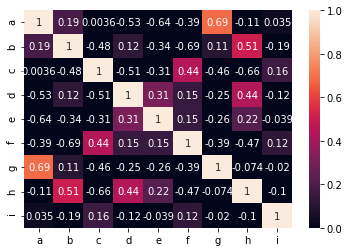

In [33]:
sns.heatmap(CleanData.corr(), vmin=0, vmax=1, annot=True)

# Feature Transformation

PCA is used to extract the hidden structure of the dataset. PCA is used to calculate those dimensions that maximize the variance.
Hence the combination of feature that best describe the formula will be found.

In [35]:

# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=CleanData.shape[1])
pca = pca.fit(CleanData)


In [36]:
print(pca.explained_variance_ratio_)


[5.63564717e-01 2.20437574e-01 1.52728816e-01 3.64014228e-02
 1.73698029e-02 6.52376421e-03 2.50673653e-03 4.66913227e-04
 2.53132985e-07]


In [37]:
display(pca.explained_variance_ratio_.cumsum())

array([0.56356472, 0.78400229, 0.93673111, 0.97313253, 0.99050233,
       0.9970261 , 0.99953283, 0.99999975, 1.        ])

In [38]:
#Apply PCA by fitting the CleanData with only two dimensions
pca = PCA(n_components=2)
pca.fit(CleanData)
reduced_data = pca.transform(CleanData)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [39]:
display(pd.DataFrame(np.round(reduced_data, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.6226,-0.2219
1,-0.0489,1.7407
2,-0.6878,-0.2721
3,-1.0749,-0.1126
4,-0.6300,-0.2931
5,-0.8811,-0.5921
6,-0.6134,-0.2510
7,-0.2441,1.5208
8,-0.7012,0.0766
9,-0.7798,-0.7980


In [40]:
scores = {}
for i in range (2, 20):
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_
    #print('Cluster Center: ' + str(centers))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[i] = score
    #print('Silhouette score is: ' + str(score), '\n')
    
#print('Scores: ' + str(scores))
    print ("For i = {}. The average silhouette_score is : {}".format(i, score))

Number of clusters: 2
For i = 2. The average silhouette_score is : 0.5724561929411591
Number of clusters: 3
For i = 3. The average silhouette_score is : 0.45005688069699884
Number of clusters: 4
For i = 4. The average silhouette_score is : 0.3971277320800635
Number of clusters: 5
For i = 5. The average silhouette_score is : 0.3839420197886252
Number of clusters: 6
For i = 6. The average silhouette_score is : 0.3890680854772093
Number of clusters: 7
For i = 7. The average silhouette_score is : 0.42262269127103225
Number of clusters: 8
For i = 8. The average silhouette_score is : 0.47629716747853235
Number of clusters: 9
For i = 9. The average silhouette_score is : 0.40248502398916014
Number of clusters: 10
For i = 10. The average silhouette_score is : 0.28717258785396915
Number of clusters: 11
For i = 11. The average silhouette_score is : 0.454302319468571
Number of clusters: 12
For i = 12. The average silhouette_score is : 0.44963254320463186
Number of clusters: 13
For i = 13. The aver

Cluster 2 has the higher silhouette score 